# Tiny Quickstart: Binary Classification with Factual Explanations

## Learning objectives
- Get started with calibrated explanations in under 5 minutes.
- Understand factual explanations for binary classification.

## Time to run
~2-3 min

In [1]:
# Import required libraries
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from calibrated_explanations import CalibratedExplainer, __version__

print("Calibrated Explanations version:", __version__)

Calibrated Explanations version: v0.10.1


In [2]:
# Load and prepare data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_proper, X_cal, y_proper, y_cal = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)

In [3]:
# Initialize and train tiny classifier
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_proper, y_proper)

RandomForestClassifier(n_estimators=10, random_state=42)

In [4]:
# Calibrate explainer
ce = CalibratedExplainer(model, X_cal, y_cal)

c:\Users\loftuw\AppData\Local\anaconda3\envs\calibrated_explanations_env\lib\importlib\__init__.py:126: UserWarning: Cache backend fallback: using minimal in-package LRU/TTL implementation due to missing 'cachetools'
  return _bootstrap._gcd_import(name[level:], package, level)


In [5]:
# Explain one instance
explanations = ce.explain_factual(X_test[:1])
explanation = explanations.get_explanation(0)
print("Prediction:", explanation.prediction["predict"])

Prediction: 0.8602150537634408


C:\Users\loftuw\CUDATemp\ipykernel_54620\1369054580.py:3: DeprecationWarning: This method is deprecated and may be removed in future versions. Use indexing instead.
  explanation = explanations.get_explanation(0)


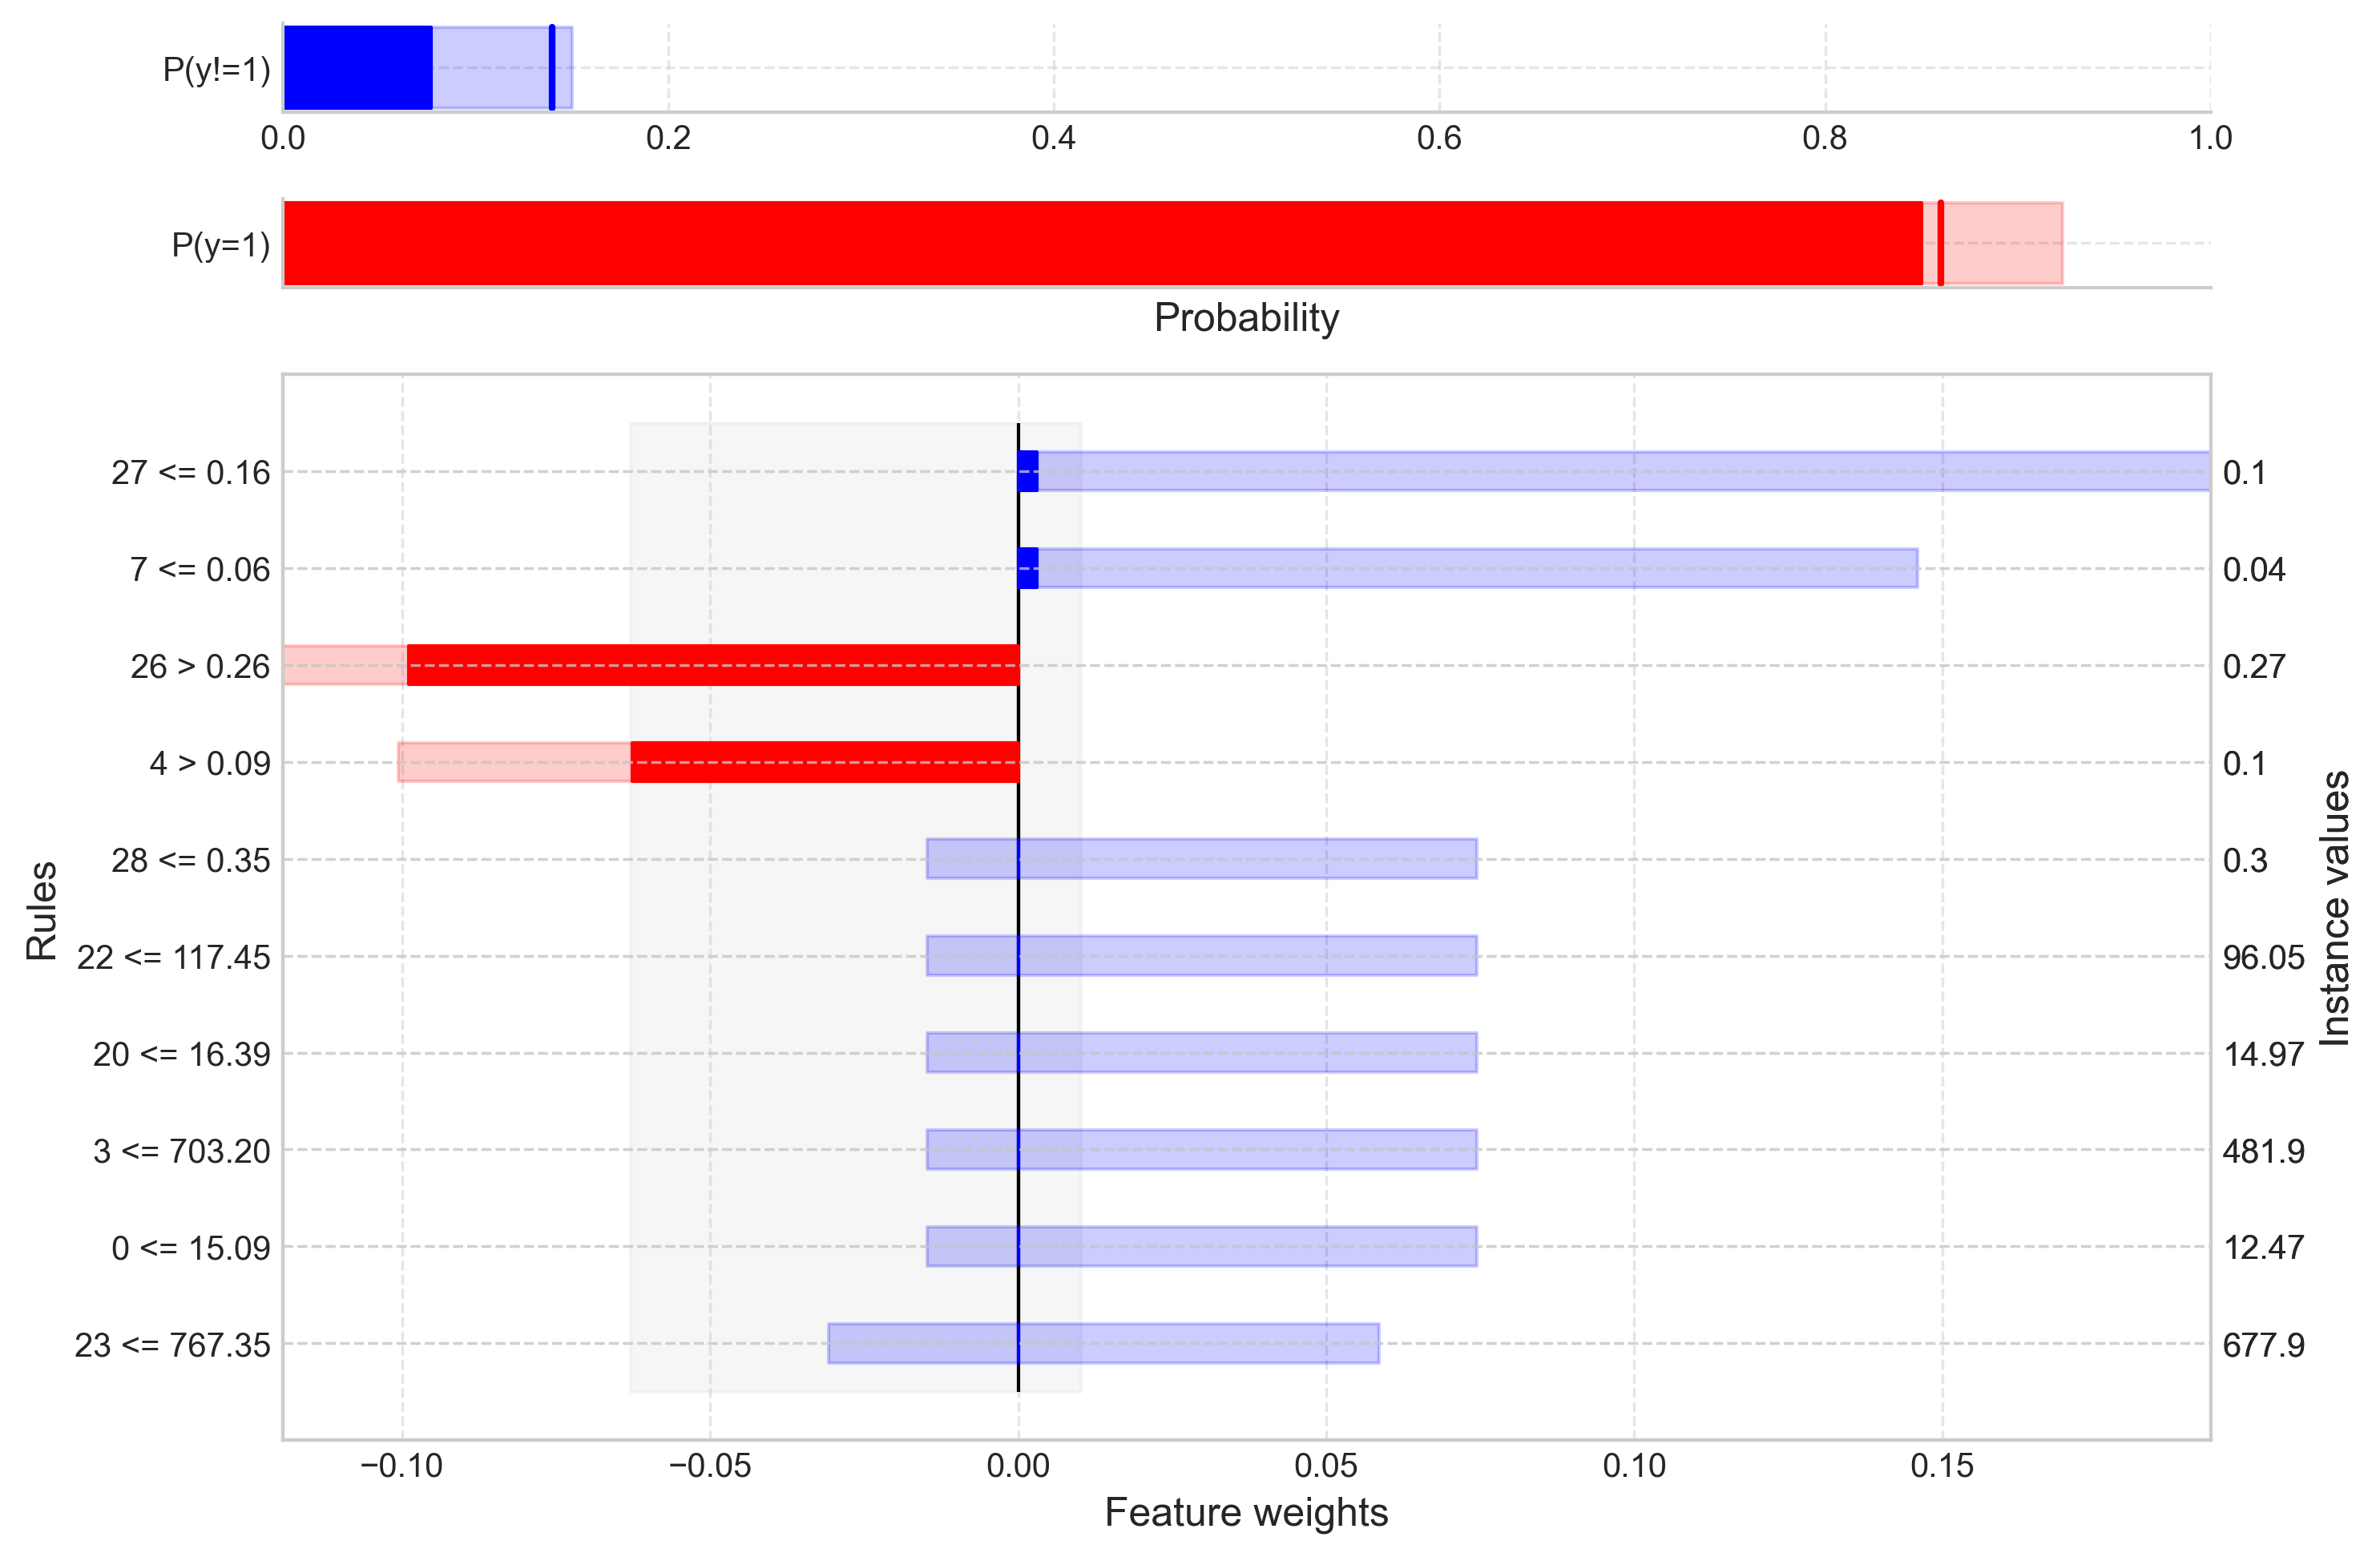

In [6]:
# Plot factual explanation with uncertainty
explanation.plot(uncertainty=True, filter_top=10)